**The same task as Lab 1 except using `Word Embeddings OR RNNs`**

**Watch out!<br>
Preproceesing here is a a bit different<br>
Just take the cleaned data from the previous lab and cont...**


**Dataset**
labeled datasset collected from twitter

**Objective**
classify tweets containing hate speech from other tweets.
0 -> no hate speech
1 -> contains hate speech

**Total Estimated Time = 60 Mins**

## Mariam Ehab Mostafa Ahmed 
## Group 2
## Smart

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras import Input 
from keras.layers import Dense, SimpleRNN 

In [2]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

### Load Dataset

In [3]:
Data= pd.read_csv('/content/dataset.csv')

In [4]:
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


### Preprocessing


In [5]:
Data.isnull().values.any()

False

In [6]:
Data['tweet'].duplicated().unique().tolist()

[False, True]

In [7]:
Data['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

0    29720
1     2242
Name: label, dtype: int64

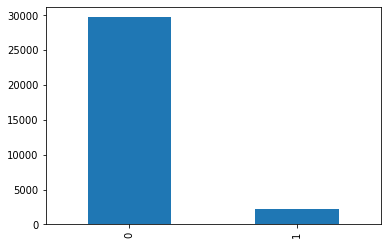

In [8]:
Data['label'].value_counts().plot(kind='bar')
Data['label'].value_counts()

In [9]:
Data['tweet'].duplicated().unique().tolist()

[False, True]

In [10]:
Data=Data.drop(['id'], axis=1)

In [11]:
Data

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [12]:
Data.drop_duplicates(inplace=True)

In [13]:
Data['tweet'].duplicated().unique().tolist()

[False]

In [14]:
def replace_user(text):
    return re.sub(r'\@user+', '', text)
Data['Processed'] =  Data['tweet'].apply(lambda x: replace_user(x))

In [15]:
def replace_numbers(text):
    return re.sub(r'\d+', '', text)
Data['Processed'] =  Data['Processed'].apply(lambda x: replace_user(x))

In [16]:
Data['Processed'] = Data['Processed'] .apply(lambda x: x.lower())

In [17]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
Data['Processed'] = Data['Processed'].apply(lambda x:remove_punctuation(x))

In [18]:
Data['Processed'] = Data['Processed'].str.encode('ascii', 'ignore').str.decode('ascii')

In [19]:
Data

,label,tweet,Processed
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,off fishing tomorrow carnt wait first time in...
31957,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...


### Modelling
**Use any Advanced technique such as: word2vec, glove, RNNs ... etc**

##  BoW (Binary features)

In [20]:
from sklearn.model_selection import train_test_split
Features= Data['Processed']
labels = Data['label']
X_train, X_test, y_train, y_test = train_test_split(Features, labels, shuffle=True, test_size=0.2,random_state=42)
X_tst, X_val, y_tst, y_val = train_test_split(X_test, y_test, shuffle=True, test_size=0.5,random_state=42)

In [21]:
tok = Tokenizer(num_words=1000, oov_token='UNK')
tok.fit_on_texts(X_train)
vectorized_X_train = tok.texts_to_matrix(X_train)
vectorized_X_test = tok.texts_to_matrix(X_val)

In [22]:
print(vectorized_X_train.shape)
print(vectorized_X_test.shape)

(23624, 1000)
(2953, 1000)


## TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf.fit(vectorized_X_train)
tfidf_X_train = tfidf.transform(vectorized_X_train)
tfidf_X_test = tfidf.transform(vectorized_X_test)

## LSTM

In [24]:
vocab_size = 20000 
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [25]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [26]:
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [27]:
y_train = np.array(y_train)
y_val = np.array(y_val)

In [28]:
embedding_dim = 16
lstm_dim = 32

In [29]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(lstm_dim),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [32]:
history_lstm = model_lstm.fit(X_train_pad, y_train, epochs=10, validation_data=(X_val_pad, y_val))

Epoch 1/10
739/739 [==============================] - 16s 17ms/step - loss: 0.2845 - accuracy: 0.9314 - val_loss: 0.2492 - val_accuracy: 0.9326
Epoch 2/10
739/739 [==============================] - 13s 17ms/step - loss: 0.2608 - accuracy: 0.9321 - val_loss: 0.3872 - val_accuracy: 0.9326
Epoch 3/10
739/739 [==============================] - 10s 13ms/step - loss: 0.2608 - accuracy: 0.9321 - val_loss: 0.2827 - val_accuracy: 0.9326
Epoch 4/10
739/739 [==============================] - 6s 9ms/step - loss: 0.2575 - accuracy: 0.9321 - val_loss: 0.2787 - val_accuracy: 0.9326
Epoch 5/10
739/739 [==============================] - 6s 9ms/step - loss: 0.2546 - accuracy: 0.9321 - val_loss: 0.2839 - val_accuracy: 0.9326
Epoch 6/10
739/739 [==============================] - 6s 9ms/step - loss: 0.2553 - accuracy: 0.9321 - val_loss: 0.4884 - val_accuracy: 0.9326
Epoch 7/10
739/739 [==============================] - 7s 9ms/step - loss: 0.2547 - accuracy: 0.9321 - val_loss: 0.3288 - val_accuracy: 0.9326


#### Evaluation

In [35]:
accuracy = history_lstm.history['accuracy']
val_accuracy = history_lstm.history['val_accuracy']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

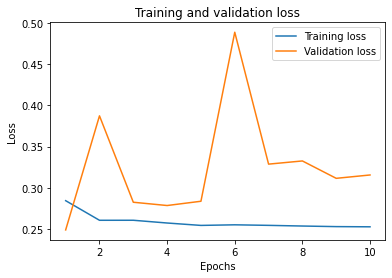

In [36]:
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

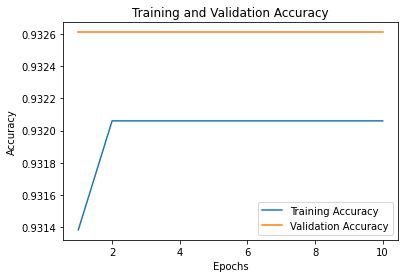

In [37]:
plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Word2Vec

In [38]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100')

In [39]:
vector_size = 100
gensim_weight_matrix = np.zeros((vocab_size ,vector_size))
gensim_weight_matrix.shape

(20000, 100)

In [40]:
for word, index in tokenizer.word_index.items():
    if index < vocab_size: 
        if word in glove_gensim.wv.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
model = models.Sequential()
model.add(layers.Embedding(vocab_size, vector_size, weights = [gensim_weight_matrix], trainable = False))
model.add(layers.LSTM(50))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         2000000   
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense_3 (Dense)             (None, 128)               6528      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,036,857
Trainable params: 36,857
Non-trainable params: 2,000,000
_________________________________________________________________


In [43]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.0001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [44]:
history= model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_val_pad, y_val))

Epoch 1/10
739/739 [==============================] - 9s 10ms/step - loss: 0.2769 - binary_accuracy: 0.9321 - val_loss: 0.2029 - val_binary_accuracy: 0.9326
Epoch 2/10
739/739 [==============================] - 6s 8ms/step - loss: 0.1906 - binary_accuracy: 0.9321 - val_loss: 0.1855 - val_binary_accuracy: 0.9326
Epoch 3/10
739/739 [==============================] - 6s 8ms/step - loss: 0.1759 - binary_accuracy: 0.9321 - val_loss: 0.1783 - val_binary_accuracy: 0.9326
Epoch 4/10
739/739 [==============================] - 6s 8ms/step - loss: 0.1701 - binary_accuracy: 0.9325 - val_loss: 0.1747 - val_binary_accuracy: 0.9323
Epoch 5/10
739/739 [==============================] - 6s 8ms/step - loss: 0.1644 - binary_accuracy: 0.9352 - val_loss: 0.1861 - val_binary_accuracy: 0.9313
Epoch 6/10
739/739 [==============================] - 6s 8ms/step - loss: 0.1603 - binary_accuracy: 0.9379 - val_loss: 0.1711 - val_binary_accuracy: 0.9265
Epoch 7/10
739/739 [==============================] - 6s 8ms/st

#### Evaluation

In [45]:
accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

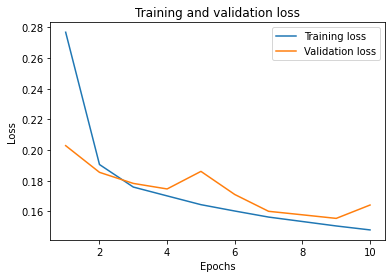

In [46]:
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

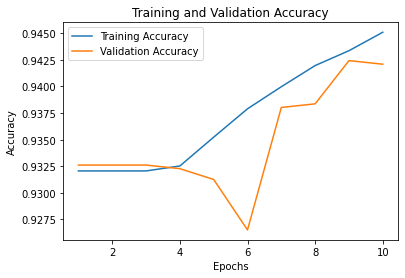

In [47]:
plt.plot(epochs, accuracy, label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Done!